In [1]:
# !pip install datapungibea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

import datapungibea as dpb
key = '1FD5DC35-4854-4CE8-8D43-B36065C37041'
data = dpb.data(key) 
data

C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# Collect county level variables
for_county_index = data.Regional(GeoFips = "COUNTY",
              LineCode = "1",
              TableName = "CAGDP9", 
              Year = "2010")
for_county_index

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-1,01001,"Autauga, AL",2010,Thousands of chained 2012 dollars,3,"1,286,603",NaN
1,CAGDP9-1,01003,"Baldwin, AL",2010,Thousands of chained 2012 dollars,3,"5,381,575",NaN
2,CAGDP9-1,01005,"Barbour, AL",2010,Thousands of chained 2012 dollars,3,"784,043",NaN
3,CAGDP9-1,01007,"Bibb, AL",2010,Thousands of chained 2012 dollars,3,"364,023",NaN
4,CAGDP9-1,01009,"Blount, AL",2010,Thousands of chained 2012 dollars,3,"839,899",NaN
...,...,...,...,...,...,...,...,...
3113,CAGDP9-1,56037,"Sweetwater, WY",2010,Thousands of chained 2012 dollars,3,"4,423,250",NaN
3114,CAGDP9-1,56039,"Teton, WY",2010,Thousands of chained 2012 dollars,3,"1,811,469",NaN
3115,CAGDP9-1,56041,"Uinta, WY",2010,Thousands of chained 2012 dollars,3,"1,215,130",NaN
3116,CAGDP9-1,56043,"Washakie, WY",2010,Thousands of chained 2012 dollars,3,"388,974",NaN


In [3]:
counties = for_county_index["GeoFips"]
counties

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3113    56037
3114    56039
3115    56041
3116    56043
3117    56045
Name: GeoFips, Length: 3118, dtype: object

In [4]:
for_GDP_components = data.Regional(GeoFips = "01001",
              LineCode = "ALL",
              TableName = "CAGDP9", 
              Year = "2010")
for_GDP_components

,Code,GeoFips,GeoName,TimePeriod,Description,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-36,01001,"Autauga, AL",2010,Transportation and warehousing,Thousands of chained 2012 dollars,3,"12,922",NaN
1,CAGDP9-35,01001,"Autauga, AL",2010,Retail trade,Thousands of chained 2012 dollars,3,"94,387",NaN
2,CAGDP9-92,01001,"Autauga, AL",2010,Private services-providing industries 3/,Thousands of chained 2012 dollars,3,"803,805",NaN
3,CAGDP9-34,01001,"Autauga, AL",2010,Wholesale trade,Thousands of chained 2012 dollars,3,"45,831",NaN
4,CAGDP9-25,01001,"Autauga, AL",2010,Nondurable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
5,CAGDP9-13,01001,"Autauga, AL",2010,Durable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
6,CAGDP9-12,01001,"Autauga, AL",2010,Manufacturing,Thousands of chained 2012 dollars,3,"212,608",NaN
7,CAGDP9-11,01001,"Autauga, AL",2010,Construction,Thousands of chained 2012 dollars,3,"39,798",NaN
8,CAGDP9-10,01001,"Autauga, AL",2010,Utilities,Thousands of chained 2012 dollars,3,"204,705",NaN
9,CAGDP9-6,01001,"Autauga, AL",2010,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,3,"9,415",NaN


In [5]:
GDP_components = for_GDP_components[["Code", "Description"]]
GDP_components

,Code,Description
0,CAGDP9-36,Transportation and warehousing
1,CAGDP9-35,Retail trade
2,CAGDP9-92,Private services-providing industries 3/
3,CAGDP9-34,Wholesale trade
4,CAGDP9-25,Nondurable goods manufacturing
5,CAGDP9-13,Durable goods manufacturing
6,CAGDP9-12,Manufacturing
7,CAGDP9-11,Construction
8,CAGDP9-10,Utilities
9,CAGDP9-6,"Mining, quarrying, and oil and gas extraction"


In [6]:
# import time
# import random

# for row in GDP_components.iterrows():
#     full_code, description = row[1]
#     table_name, code = full_code.split("-")
   
#     try:
#         GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
#               LineCode = code,
#               TableName = table_name, 
#               Year = "ALL")
#         print(full_code +": " + description + " downloaded")
#     except:
#         print(full_code +": Error downloading " + description)
#     time.sleep(10)

In [7]:
import os
GDP_data_dct = {}
folder1 = "Data"
folder2 = "CountyGDP"
try:
    os.mkdir(folder1)
    os.mkdir(folder1 + "/" + folder2)
except:
    try: 
        os.mkdir(folder1 + "/" + folder2)
    except:
        pass
# for key, val in GDP_data_dct.items():
#     val.to_csv(folder1 + "/" + folder2 + "/" + key.replace("/","") + ".csv")

for row in GDP_components.iterrows():
    full_code, description = row
    description = description[1]
    # somehow, space added in very last character of description
    GDP_data_dct[description] = pd.read_csv("Data/CountyGDP/" + description[:-1].replace("/","") + ".csv")
GDP_data_dct
# GDP_components

{'Transportation and warehousing ':        Unnamed: 0       Code  GeoFips      GeoName  TimePeriod  \
 0               0  CAGDP9-36     1001  Autauga, AL        2001   
 1               1  CAGDP9-36     1001  Autauga, AL        2002   
 2               2  CAGDP9-36     1001  Autauga, AL        2003   
 3               3  CAGDP9-36     1001  Autauga, AL        2004   
 4               4  CAGDP9-36     1001  Autauga, AL        2005   
 ...           ...        ...      ...          ...         ...   
 62355       62355  CAGDP9-36    56045   Weston, WY        2016   
 62356       62356  CAGDP9-36    56045   Weston, WY        2017   
 62357       62357  CAGDP9-36    56045   Weston, WY        2018   
 62358       62358  CAGDP9-36    56045   Weston, WY        2019   
 62359       62359  CAGDP9-36    56045   Weston, WY        2020   
 
                                  CL_UNIT  UNIT_MULT DataValue NoteRef  
 0      Thousands of chained 2012 dollars          3    17,259     NaN  
 1      Thous

In [8]:
os.getcwd()

# for a,b,c in os.walk("."):
#     print(a,b,c)

'C:\\Users\\abiodun.idowu\\OneDrive - North Dakota University System\\Desktop\\PhD\\BEA project\\notebook_to_start'

In [9]:
full_df = pd.DataFrame({key[:-1]: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
for key, val in full_df.items():
    try:
        full_df[key] = val.str.replace(
            ",","").replace("(NA)",np.NaN).replace("(D)", np.NaN).astype(float)
    except:
        continue
            
full_df

Transportation and warehousing  Retail trade  \
GeoFips TimePeriod                                                 
1001    2001                               17259.0       93043.0   
        2002                               16730.0      101381.0   
        2003                               16675.0      110349.0   
        2004                               17863.0      115615.0   
        2005                               19578.0      115668.0   
...                                            ...           ...   
56045   2016                               22895.0       14792.0   
        2017                               14569.0       14672.0   
        2018                               16674.0       14526.0   
        2019                               15139.0       13937.0   
        2020                               13851.0       14053.0   

                    Private services-providing industries 3  Wholesale trade  \
GeoFips TimePeriod                                                             
1001    2001                                       471633.0          22902.0   
        2002                                       528373.0          25425.0   
        2003                                       562871.0          29829.0   
        2004                                       642394.0          29870.0   
        2005                                       650688.0          34717.0   
...                                                     ...              ...   
56045   2016                                       111251.0              NaN   
        2017                                        95380.0              NaN   
        2018                                        95601.0           1971.0   
        2019                                        93987.0           1972.0   
        2020                                        90880.0           2661.0   

                    Nondurable goods manufacturing  \
GeoFips TimePeriod                                   
1001    2001                                   NaN   
        2002                                   NaN   
        2003                              143362.0   
        2004                                   NaN   
        2005                                   NaN   
...                                            ...   
56045   2016                                   NaN   
        2017                                   NaN   
        2018                              107403.0   
        2019                              122440.0   
        2020                              134673.0   

                    Durable goods manufacturing  Manufacturing  Construction  \
GeoFips TimePeriod                                                             
1001    2001                                NaN       211416.0      111710.0   
        2002                                NaN       212494.0       69905.0   
        2003                            37954.0       182349.0       64250.0   
        2004                                NaN       236107.0       65860.0   
        2005                                NaN       253936.0       55006.0   
...                                         ...            ...           ...   
56045   2016                                NaN        77947.0       11967.0   
        2017                                NaN       101963.0        8527.0   
        2018                                NaN            NaN           NaN   
        2019                                NaN            NaN           NaN   
        2020                                NaN            NaN           NaN   

                    Utilities  Mining, quarrying, and oil and gas extraction  \
GeoFips TimePeriod                                                             
1001    2001          23121.0                                         4644.0   
        2002          53320.0                                         3053.0   
        2003          57076.0 

In [10]:
full_df["All industry total"]

GeoFips  TimePeriod
1001     2001           949800.0
         2002           984039.0
         2003          1008032.0
         2004          1170278.0
         2005          1195319.0
                         ...    
56045    2016           305446.0
         2017           300909.0
         2018           315332.0
         2019           322576.0
         2020           312665.0
Name: All industry total, Length: 62360, dtype: float64

In [11]:
# full_df[["Private industries ", "Utilities "]]
list (full_df.keys())

['Transportation and warehousing',
 'Retail trade',
 'Private services-providing industries 3',
 'Wholesale trade',
 'Nondurable goods manufacturing',
 'Durable goods manufacturing',
 'Manufacturing',
 'Construction',
 'Utilities',
 'Mining, quarrying, and oil and gas extraction',
 'Agriculture, forestry, fishing and hunting',
 'Private industries',
 'All industry total',
 'Private goods-producing industries 2',
 'Manufacturing and information',
 'Transportation and utilities',
 'Trade',
 'Natural resources and mining',
 'Government and government enterprises',
 'Other services (except government and government enterprises)',
 'Accommodation and food services',
 'Arts, entertainment, and recreation',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Health care and social assistance',
 'Educational services',
 'Educational services, health care, and social assistance',
 'Administrative and support and waste management and remediation services',
 'Management of com

In [12]:
inputs = ['All industry total',"Utilities", "Mining, quarrying, and oil and gas extraction", 'Agriculture, forestry, fishing and hunting']
for key in inputs:
    full_df[key + " 3YMA"] = full_df.reset_index().set_index(["TimePeriod"], drop = False).groupby("GeoFips")[key].rolling(3).mean().shift()
log_df = np.log(full_df)#.groupby("GeoFips").diff()
for key in inputs:
    log_df[key + " Volatility"] = (log_df[key].sub(log_df[key + " 3YMA"])).pow(2).pow(.5)
# for key in inputs:

- GDP 
-- layer1

In [13]:
import json

In [14]:
toc = """All industry total
1 Private industries
1.1 Agriculture, forestry, fishing and hunting
1.2 Mining, quarrying, and oil and gas extraction
1.3 Utilities
1.4 Construction
1.5 Manufacturing
1.5.1 Durable goods manufacturing
1.5.2 Nondurable goods manufacturing
1.6 Wholesale trade
1.7 Retail trade
1.8 Transportation and warehousing
1.9 Information
1.10 Finance, insurance, real estate, rental, and leasing
1.11 Finance and insurance
1.12 Real estate and rental and leasing
1.13 Professional and business services
1.14 Professional, scientific, and technical services
1.15 Management of companies and enterprises
1.16 Administrative and support and waste management and remediation services
1.17 Educational services, health care, and social assistance
1.18 Educational services
1.19 Health care and social assistance
1.20 Arts, entertainment, recreation, accommodation, and food services
1.21 Arts, entertainment, and recreation
1.22 Accommodation and food services
1.23 Other services (except government and government enterprises)
1.24 Government and government enterprises
1.25 Natural resources and mining
1.26 Trade
1.27 Transportation and utilities
1.28 Manufacturing and information
1.29 Private goods-producing industries 2/
1.30 Private services-providing industries 3/
2 """

myfile = 'GDP'

data = {myfile:{}}
for line in toc.splitlines():
    levels, title = line.split(' ', maxsplit=1)
    levels = levels.rstrip('.').split('.')
    if len(levels) == 1:
        heading = title
        data[myfile][heading] = {}
    elif len(levels) == 2:
        sub_heading = title
        data[myfile][heading][sub_heading] = []
#     if len(levels) == 3:
#         data[myfile][heading][sub_heading].append(title)

print(json.dumps(data, indent=4))

{
    "GDP": {
        "industry total": {},
        "Private industries": {
            "Agriculture, forestry, fishing and hunting": [],
            "Mining, quarrying, and oil and gas extraction": [],
            "Utilities": [],
            "Construction": [],
            "Manufacturing": [],
            "Wholesale trade": [],
            "Retail trade": [],
            "Transportation and warehousing": [],
            "Information": [],
            "Finance, insurance, real estate, rental, and leasing": [],
            "Finance and insurance": [],
            "Real estate and rental and leasing": [],
            "Professional and business services": [],
            "Professional, scientific, and technical services": [],
            "Management of companies and enterprises": [],
            "Administrative and support and waste management and remediation services": [],
            "Educational services, health care, and social assistance": [],
            "Educational services": []

In [15]:
dct = data["GDP"]
layer1 = list(dct.keys())
layer1.pop()
layer2 = []
for key in layer1:
    layer2 = layer2 + list(dct[key].keys())
layers = {0:layer1,
         1:layer2}
layers

{0: ['industry total', 'Private industries'],
 1: ['Agriculture, forestry, fishing and hunting',
  'Mining, quarrying, and oil and gas extraction',
  'Utilities',
  'Construction',
  'Manufacturing',
  'Wholesale trade',
  'Retail trade',
  'Transportation and warehousing',
  'Information',
  'Finance, insurance, real estate, rental, and leasing',
  'Finance and insurance',
  'Real estate and rental and leasing',
  'Professional and business services',
  'Professional, scientific, and technical services',
  'Management of companies and enterprises',
  'Administrative and support and waste management and remediation services',
  'Educational services, health care, and social assistance',
  'Educational services',
  'Health care and social assistance',
  'Arts, entertainment, recreation, accommodation, and food services',
  'Arts, entertainment, and recreation',
  'Accommodation and food services',
  'Other services (except government and government enterprises)',
  'Government and gover

In [16]:
layer2

['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transpor

In [17]:
# keys = ['Agriculture, forestry, fishing and hunting',
#  'Mining, quarrying, and oil and gas extraction',
#  'Utilities',
#  'Construction',
#  'Manufacturing',
#  'Wholesale trade',
#  'Retail trade',
#  'Transportation and warehousing',
#  'Information',
#  'Finance, insurance, real estate, rental, and leasing',
#  'Finance and insurance',
#  'Professional and business services',
#  'Educational services, health care, and social assistance',
#  'Arts, entertainment, recreation, accommodation, and food services',
#  'Other services (except government and government enterprises)',
#  'Government and government enterprises']

In [18]:
# data2 = log_df[layer2].groupby("GeoFips").diff()
# # list(log_df.keys())

In [19]:
# data2

# list(data2)
# log_df
full_df

Transportation and warehousing  Retail trade  \
GeoFips TimePeriod                                                 
1001    2001                               17259.0       93043.0   
        2002                               16730.0      101381.0   
        2003                               16675.0      110349.0   
        2004                               17863.0      115615.0   
        2005                               19578.0      115668.0   
...                                            ...           ...   
56045   2016                               22895.0       14792.0   
        2017                               14569.0       14672.0   
        2018                               16674.0       14526.0   
        2019                               15139.0       13937.0   
        2020                               13851.0       14053.0   

                    Private services-providing industries 3  Wholesale trade  \
GeoFips TimePeriod                                                             
1001    2001                                       471633.0          22902.0   
        2002                                       528373.0          25425.0   
        2003                                       562871.0          29829.0   
        2004                                       642394.0          29870.0   
        2005                                       650688.0          34717.0   
...                                                     ...              ...   
56045   2016                                       111251.0              NaN   
        2017                                        95380.0              NaN   
        2018                                        95601.0           1971.0   
        2019                                        93987.0           1972.0   
        2020                                        90880.0           2661.0   

                    Nondurable goods manufacturing  \
GeoFips TimePeriod                                   
1001    2001                                   NaN   
        2002                                   NaN   
        2003                              143362.0   
        2004                                   NaN   
        2005                                   NaN   
...                                            ...   
56045   2016                                   NaN   
        2017                                   NaN   
        2018                              107403.0   
        2019                              122440.0   
        2020                              134673.0   

                    Durable goods manufacturing  Manufacturing  Construction  \
GeoFips TimePeriod                                                             
1001    2001                                NaN       211416.0      111710.0   
        2002                                NaN       212494.0       69905.0   
        2003                            37954.0       182349.0       64250.0   
        2004                                NaN       236107.0       65860.0   
        2005                                NaN       253936.0       55006.0   
...                                         ...            ...           ...   
56045   2016                                NaN        77947.0       11967.0   
        2017                                NaN       101963.0        8527.0   
        2018                                NaN            NaN           NaN   
        2019                                NaN            NaN           NaN   
        2020                                NaN            NaN           NaN   

                    Utilities  Mining, quarrying, and oil and gas extraction  \
GeoFips TimePeriod                                                             
1001    2001          23121.0                                         4644.0   
        2002          53320.0                                         3053.0   
        2003          57076.0 

In [20]:
data_dct_ips = {}
data_dct_ips['Log_Data'] = np.log(full_df)
data_dct_ips['Diff1'] = data_dct_ips['Log_Data'].groupby('GeoFips').diff()
data_dct_ips

{'Log_Data':                     Transportation and warehousing  Retail trade  \
 GeoFips TimePeriod                                                 
 1001    2001                              9.756089     11.440817   
         2002                              9.724959     11.526641   
         2003                              9.721666     11.611403   
         2004                              9.790487     11.658021   
         2005                              9.882162     11.658479   
 ...                                            ...           ...   
 56045   2016                             10.038674      9.601842   
         2017                              9.586651      9.593696   
         2018                              9.721606      9.583695   
         2019                              9.625029      9.542302   
         2020                              9.536113      9.550591   
 
                     Private services-providing industries 3  Wholesale trade  \
 GeoFips

In [21]:
data_dct = {}
data_dct["Log Data"] = np.log(full_df).replace([np.inf, -np.inf], np.nan)
data_dct["Diff"] = data_dct["Log Data"].groupby("GeoFips").diff()#.dropna()
data_dct["2Diff"] = data_dct["Diff"].groupby("GeoFips").diff()
data_dct

{'Log Data':                     Transportation and warehousing  Retail trade  \
 GeoFips TimePeriod                                                 
 1001    2001                              9.756089     11.440817   
         2002                              9.724959     11.526641   
         2003                              9.721666     11.611403   
         2004                              9.790487     11.658021   
         2005                              9.882162     11.658479   
 ...                                            ...           ...   
 56045   2016                             10.038674      9.601842   
         2017                              9.586651      9.593696   
         2018                              9.721606      9.583695   
         2019                              9.625029      9.542302   
         2020                              9.536113      9.550591   
 
                     Private services-providing industries 3  Wholesale trade  \
 GeoFips

write if the variables are sub-components

In [22]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total"]
ips_df = data_dct["Diff"][ips_keys]
ips_df = ips_df[ips_df.index.get_level_values("TimePeriod")>2001]
ips_df = ips_df.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()
ips_df


Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                         -0.217648   
        2003                                          0.793538   
        2004                                          0.222678   
        2005                                          0.169133   
        2006                                          0.176881   
...                                                        ...   
56041   2016                                          0.016426   
        2017                                         -0.156890   
        2018                                          0.231567   
        2019                                          0.839924   
        2020                                          0.274166   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                            -0.419451   0.835570   
        2003                                             0.191126   0.068072   
        2004                                             0.470578   0.505041   
        2005                                             0.238805  -0.239593   
        2006                                             0.342614   0.436516   
...                                                           ...        ...   
56041   2016                                            -0.081156   0.211513   
        2017                                            -0.158175   0.004846   
        2018                                            -0.207405  -0.179435   
        2019                                            -0.452308   0.279935   
        2020                                            -0.747581  -0.020288   

                    All industry total  
GeoFips TimePeriod                      
1001    2002                  0.035414  
        2003                  0.024090  
        2004                  0.149241  
        2005                  0.021172  
        2006                  0.066174  
...                                ...  
56041   2016                 -0.006544  
        2017                 -0.023853  
        2018                 -0.037587  
        2019                 -0.024081  
        2020                 -0.108416  

[11343 rows x 4 columns]

In [23]:

# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin():])
# reset_index(ips_df2)
# ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])
# reset_index(ips_df2)
# for i in range(3):
#     ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
#     reset_index(ips_df2)
# # .values.argmin()


In [24]:
# ips_df.iloc[
# data.iloc[:data.A.isnull().values.argmax()]
# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
# ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])

In [25]:
from statsmodels.tsa.stattools import adfuller

def adfuller_table(df):
    df_results = {}
    for key, vector in df.items():
        dftest = adfuller(vector, maxlag = 4, regression = 'c')
        df_results[key] = pd.Series(dftest[0:4], index = ['t-stat', 'p-value', 
                                                         '#Lags Used', 'Number of Observations Used'])
    return pd.DataFrame(df_results).round(2)

In [26]:
# adfuller_table(data_dct['Diff'])

In [27]:
import statistics
import math
data = data_dct_ips['Diff1'].replace([np.inf, -np.inf]).fillna(0)
data
data_ips = {}
# data_ips = data.reset_index()
data_ips['Diff']= data
data_ips

{'Diff':                     Transportation and warehousing  Retail trade  \
 GeoFips TimePeriod                                                 
 1001    2001                              0.000000      0.000000   
         2002                             -0.031130      0.085824   
         2003                             -0.003293      0.084762   
         2004                              0.068821      0.046618   
         2005                              0.091675      0.000458   
 ...                                            ...           ...   
 56045   2016                             -0.324262      0.001421   
         2017                             -0.452023     -0.008146   
         2018                              0.134955     -0.010001   
         2019                             -0.096576     -0.041393   
         2020                             -0.088917      0.008289   
 
                     Private services-providing industries 3  Wholesale trade  \
 GeoFips Tim

In [28]:

# data_ips_var = ['GeoFips', 'TimePeriod', 'All industry total']
# data_ips_t = data_ips[data_ips_var]
# data_ips_t
# data_ips_t['All industry total'].replace(to_replace = 0, value = 1, inplace=True)

In [29]:
# data_test = pd.read_csv('ips.csv')
# data_test

# IPS Test

In [30]:
def ips_test(data, Firm, Time):
    df = data.set_index([Firm, Time])
    df2 = data.set_index([Time, Firm])
    firms = list(data[Firm].unique())
    times = list(data[Time].unique())
    data = data.set_index(Firm)
    N = len(firms)
    dict_temp = {}

    for firm in firms:
        lag_val = []
        val_diff = []
        lag_val_diff = []
        for i in data[Time].loc[firm]:
            cur_val = i
            if lag_val == []:
                pass
            else:
                val_diff = cur_val - lag_val
            if lag_val_diff == []:
                pass
            else:
                if val_diff != lag_val_diff:
                    raise ValueError("The data does not have constant time variation")
            lag_val = i
            lag_val_diff = val_diff

        for key in df:
            total_temp_stat = 0
            for firm in firms:
                temp_df = data[[key]].loc[firm]
                temp_stat = adfuller(temp_df, maxlag = 0, regression = 'ct')[0]
                total_temp_stat += temp_stat
                t_bar = (1/N)*total_temp_stat
                dict_temp[key] = t_bar

    df_temp = pd.DataFrame([dict_temp]).T
    df_temp.columns = ['Test Stat']
    return df_temp

Download interest rate data (divisia), and average it annually

In [31]:
divisia = pd.read_excel("https://centerforfinancialstability.org/amfm/Divisia.xlsx", 
                        sheet_name = "Broad", header  =1, index_col = "Date")

index = divisia.index
keys = divisia.keys()
divisia = divisia.resample("A").mean().rename(columns={keys[0]: "M4",
                                                       keys[2]:"M4 Interest Rate"})
year_lst = [i for i in range(1966, 2023)]
divisia = divisia[["M4", "M4 Interest Rate"]].reset_index()
divisia["TimePeriod"] = year_lst
divisia = divisia.set_index("TimePeriod").drop(columns = "Date")
divisia.head()

,M4,M4 Interest Rate
TimePeriod,,
1966,103.844756,0.033092
1967,111.127648,0.036325
1968,116.671638,0.042464
1969,119.176158,0.042730
1970,130.441910,0.034850


In [32]:
# data["Level"]["$r_{M4}$"] = divisia["M4 Interest Rate"]

Add/join the interest rates to the original dataframe

In [33]:
data_df = full_df.copy().reset_index().set_index("TimePeriod")
data_df = data_df.join(divisia).reset_index()     
data_df = data_df.set_index(["GeoFips", "TimePeriod"])    
data_df = data_df.sort_index()
data_df 

Transportation and warehousing  Retail trade  \
GeoFips TimePeriod                                                 
1001    2001                               17259.0       93043.0   
        2002                               16730.0      101381.0   
        2003                               16675.0      110349.0   
        2004                               17863.0      115615.0   
        2005                               19578.0      115668.0   
...                                            ...           ...   
56045   2016                               22895.0       14792.0   
        2017                               14569.0       14672.0   
        2018                               16674.0       14526.0   
        2019                               15139.0       13937.0   
        2020                               13851.0       14053.0   

                    Private services-providing industries 3  Wholesale trade  \
GeoFips TimePeriod                                                             
1001    2001                                       471633.0          22902.0   
        2002                                       528373.0          25425.0   
        2003                                       562871.0          29829.0   
        2004                                       642394.0          29870.0   
        2005                                       650688.0          34717.0   
...                                                     ...              ...   
56045   2016                                       111251.0              NaN   
        2017                                        95380.0              NaN   
        2018                                        95601.0           1971.0   
        2019                                        93987.0           1972.0   
        2020                                        90880.0           2661.0   

                    Nondurable goods manufacturing  \
GeoFips TimePeriod                                   
1001    2001                                   NaN   
        2002                                   NaN   
        2003                              143362.0   
        2004                                   NaN   
        2005                                   NaN   
...                                            ...   
56045   2016                                   NaN   
        2017                                   NaN   
        2018                              107403.0   
        2019                              122440.0   
        2020                              134673.0   

                    Durable goods manufacturing  Manufacturing  Construction  \
GeoFips TimePeriod                                                             
1001    2001                                NaN       211416.0      111710.0   
        2002                                NaN       212494.0       69905.0   
        2003                            37954.0       182349.0       64250.0   
        2004                                NaN       236107.0       65860.0   
        2005                                NaN       253936.0       55006.0   
...                                         ...            ...           ...   
56045   2016                                NaN        77947.0       11967.0   
        2017                                NaN       101963.0        8527.0   
        2018                                NaN            NaN           NaN   
        2019                                NaN            NaN           NaN   
        2020                                NaN            NaN           NaN   

                    Utilities  Mining, quarrying, and oil and gas extraction  \
GeoFips TimePeriod                                                             
1001    2001          23121.0                                         4644.0   
        2002          53320.0                                         3053.0   
        2003          57076.0 

Convert variables to rates and differenced data

In [34]:
data_dct1 = {}
data_dct1["Log Data"] = np.log(data_df).replace([np.inf, -np.inf], np.nan)
data_dct1["Diff"] = data_dct1["Log Data"].groupby("GeoFips").diff()#.dropna()
#data_dct1["2Diff"] = data_dct1["Diff"].groupby("GeoFips").diff()
data_dct1

{'Log Data':                     Transportation and warehousing  Retail trade  \
 GeoFips TimePeriod                                                 
 1001    2001                              9.756089     11.440817   
         2002                              9.724959     11.526641   
         2003                              9.721666     11.611403   
         2004                              9.790487     11.658021   
         2005                              9.882162     11.658479   
 ...                                            ...           ...   
 56045   2016                             10.038674      9.601842   
         2017                              9.586651      9.593696   
         2018                              9.721606      9.583695   
         2019                              9.625029      9.542302   
         2020                              9.536113      9.550591   
 
                     Private services-providing industries 3  Wholesale trade  \
 GeoFips

Remove years with nan

In [35]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total",
           "M4",
           "M4 Interest Rate"]
ips_df1 = data_dct1["Log Data"][ips_keys]
ips_df1 = ips_df1[ips_df1.index.get_level_values("TimePeriod")>2001]
ips_df1 = ips_df1.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()

ips_df1["M4 Interest Rate"] = data_df["M4 Interest Rate"]
ips_df1

Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                          9.801621   
        2003                                         10.595159   
        2004                                         10.817836   
        2005                                         10.986969   
        2006                                         11.163850   
...                                                        ...   
56041   2016                                          9.037058   
        2017                                          8.880168   
        2018                                          9.111735   
        2019                                          9.951658   
        2020                                         10.225825   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                             8.023880  10.884067   
        2003                                             8.215006  10.952139   
        2004                                             8.685585  11.457180   
        2005                                             8.924390  11.217587   
        2006                                             9.267004  11.654104   
...                                                           ...        ...   
56041   2016                                            12.194111   9.942372   
        2017                                            12.035937   9.947217   
        2018                                            11.828532   9.767782   
        2019                                            11.376223  10.047718   
        2020                                            10.628642  10.027429   

                    All industry total        M4  M4 Interest Rate  
GeoFips TimePeriod                                                  
1001    2002                 13.799421  6.792169          0.007415  
        2003                 13.823510  6.840935          0.008946  
        2004                 13.972752  6.895223          0.020890  
        2005                 13.993924  6.951446          0.032386  
        2006                 14.060098  7.014897          0.033669  
...                                ...       ...               ...  
56041   2016                 13.774393  7.294383          0.003105  
        2017                 13.750540  7.337603          0.006836  
        2018                 13.712953  7.390385          0.008432  
        2019                 13.688872  7.598820          0.002033  
        2020                 13.580456  7.696537          0.000516  

[11913 rows x 6 columns]

In [36]:
# years = ips_df.groupby("TimePeriod").mean().index
# entities = ips_df.groupby("GeoFips").mean().index
# years, entities

enter data that is the same for *every* year entry

using year as example for data entry here

In [37]:
# df = ips_df.copy()
# df["New"] = np.nan
# for year in years:
#     df["New"][df.index.get_level_values("TimePeriod") == year] = year
# df

In [38]:
ips_dct = {"Log":ips_df}
ips_dct["Rates"] = ips_dct["Log"].groupby("GeoFips").diff()
ips_dct["Diff"] = ips_dct["Rates"].groupby("GeoFips").diff()

Run the IPS test

In [39]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


,Log,Rates,Diff
"Agriculture, forestry, fishing and hunting",-5.414102,-6.708298,-7.180468
"Mining, quarrying, and oil and gas extraction",-4.065713,-5.900292,-6.764893
Utilities,-4.718953,-6.403677,-7.053029
All industry total,-3.889409,-5.733595,-6.582149


In [40]:
ips_dct2 = {"Log":ips_df1}
ips_dct2["Rates"] = ips_dct2["Log"].groupby("GeoFips").diff()
ips_dct2["Diff"] = ips_dct2["Rates"].groupby("GeoFips").diff()

In [41]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct2.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


,Log,Rates,Diff
"Agriculture, forestry, fishing and hunting",-2.715746,-5.253833,-6.518411
"Mining, quarrying, and oil and gas extraction",-1.759423,-3.903908,-5.763552
Utilities,-1.409258,-4.560160,-6.163084
All industry total,-1.825759,-3.837968,-5.645070
M4,1.491140,-2.443328,-4.990252
M4 Interest Rate,-2.680607,-4.714196,-4.381563


C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set

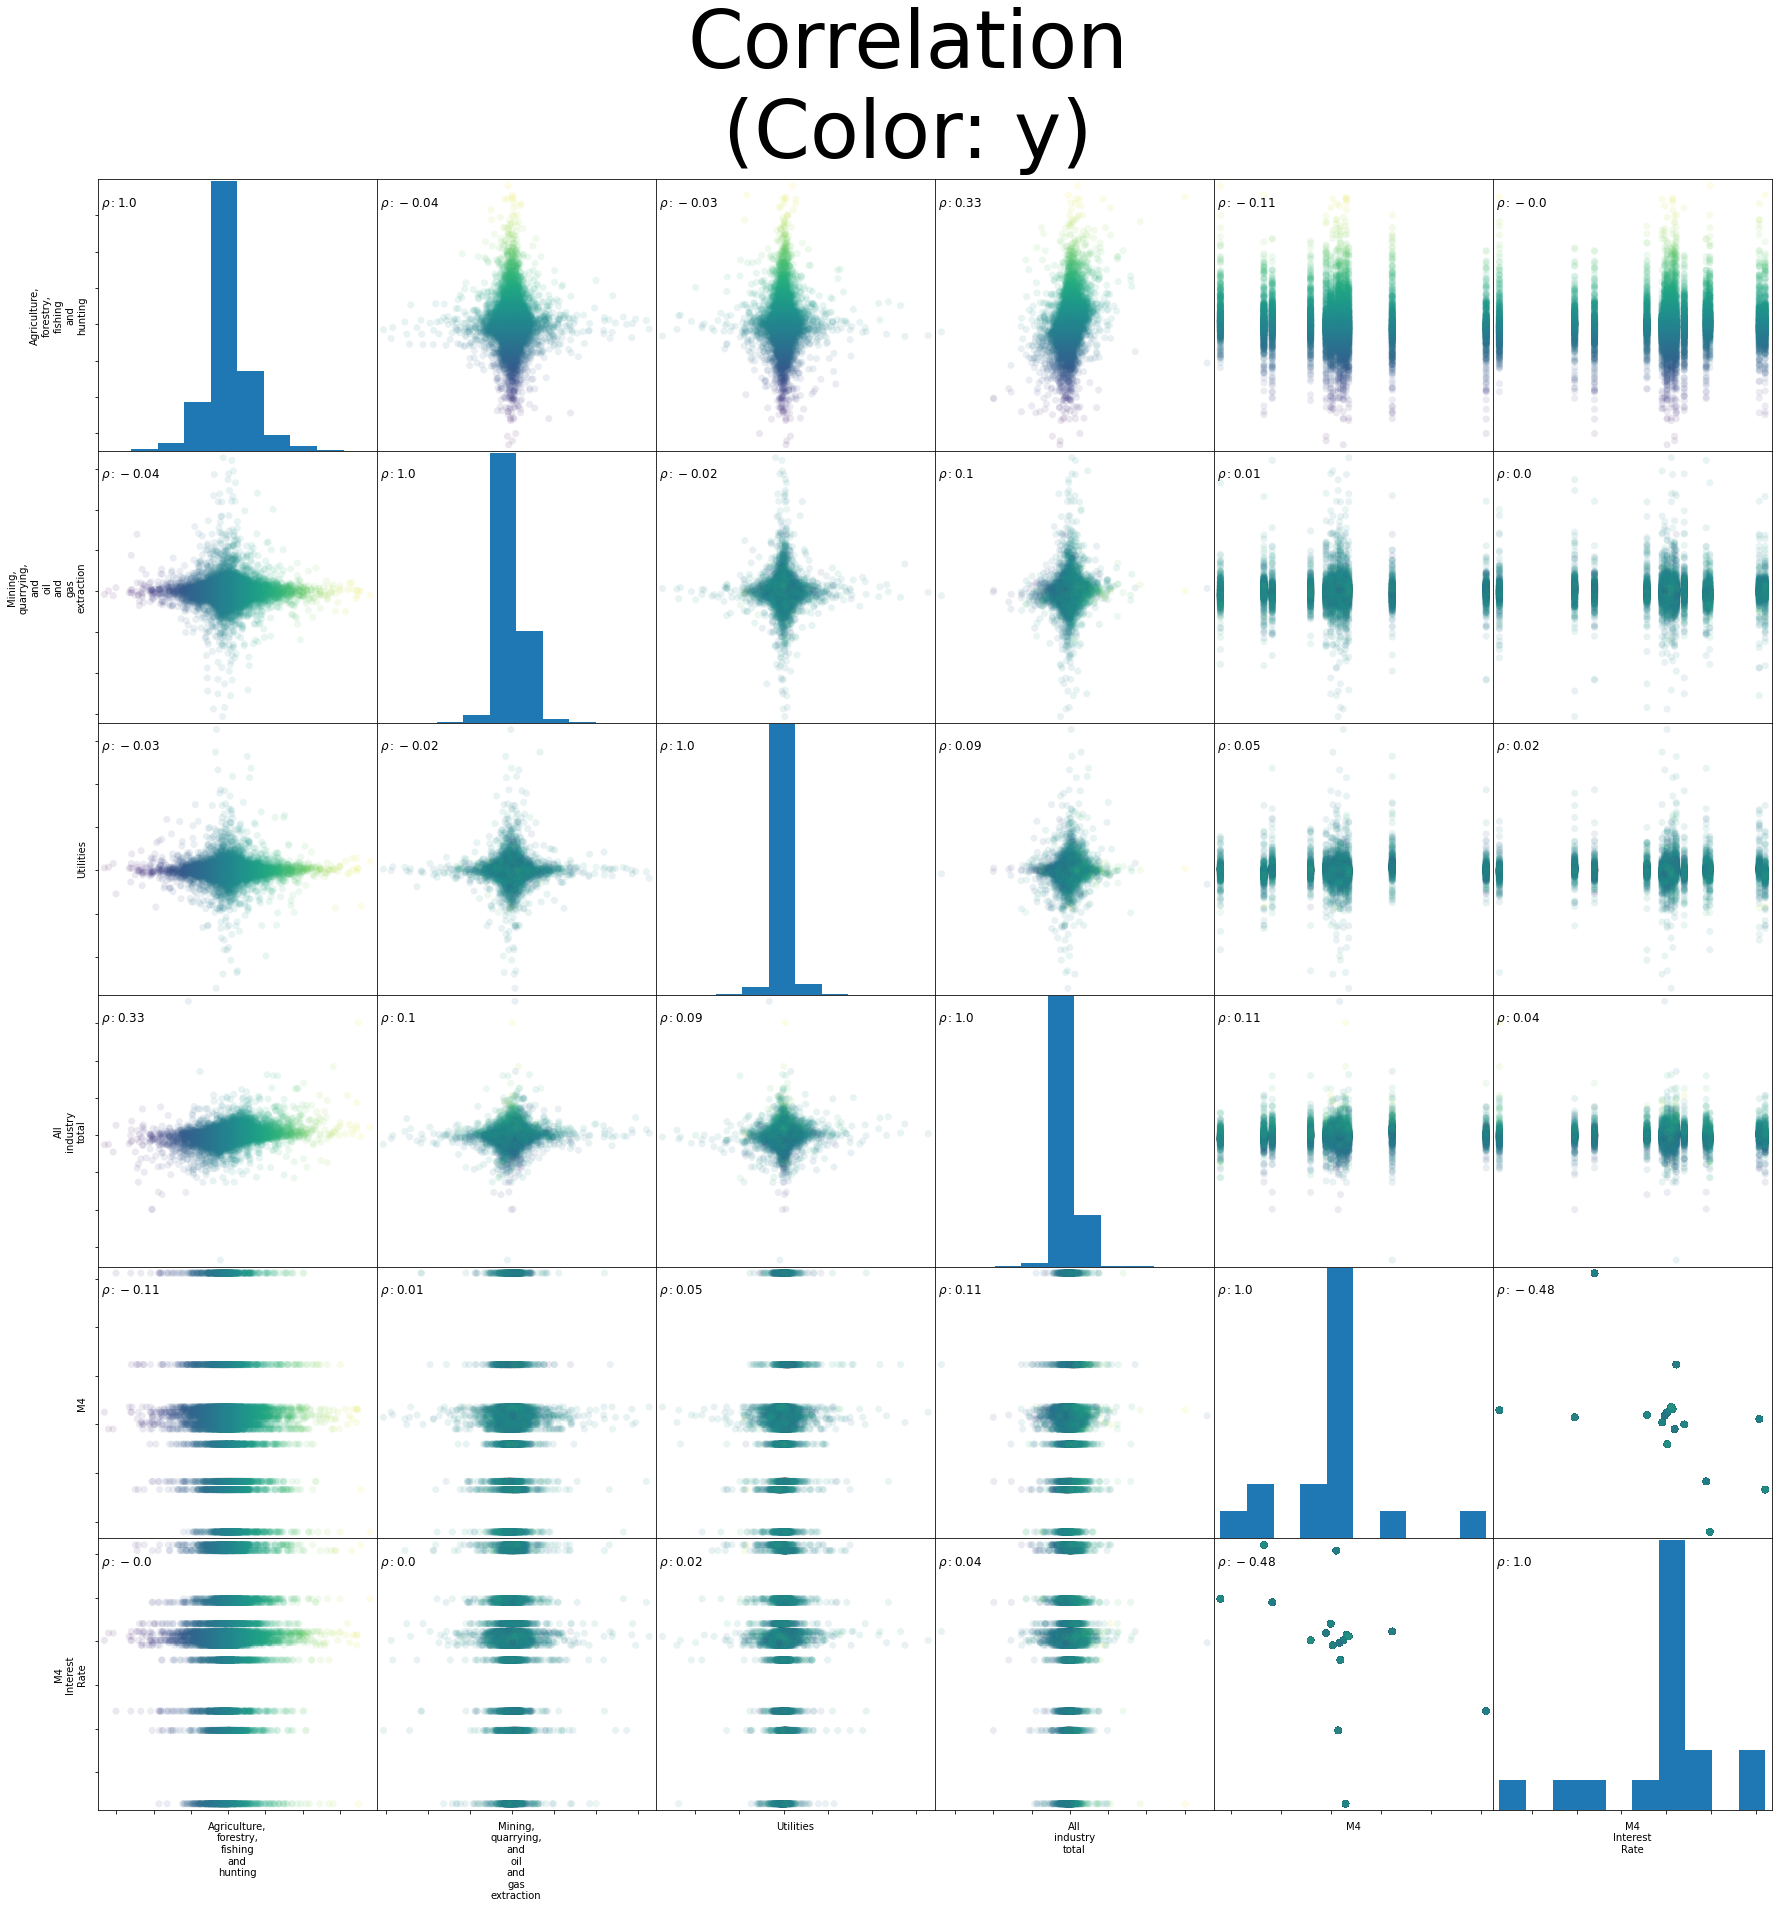

In [42]:
import pingouin
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
def full_corr_plot(data, color = "C0", pcorr = False):
    if pcorr == True:
        corr_df = data.pcorr()
    elif pcorr == False:
        corr_df = data.corr()
    keys = list(corr_df.keys())
    dim = len(keys)

    fig, ax = plt.subplots(figsize = (30, 30))
    a = pd.plotting.scatter_matrix(data, c = color, 
                                   s = 200, alpha = .1, ax=ax)  
    for i in range(len(keys)):
        x = keys[i]
        for j in range(len(keys)):
            y = keys[j]
            a[i][j].set_xticklabels([])
            a[i][j].set_yticklabels([])
            a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .88, x = 0.01, ha = "left")        
    plt.suptitle("Correlation\n(Color: y)",y = .96, fontsize = 80)
plot_df = ips_dct2['Diff'].dropna()
plot_df.rename(columns = {key:key.replace(" ", "\n") for key in plot_df.keys()}, inplace = True)
plot_keys = list(plot_df.keys())
full_corr_plot(plot_df, color = plot_df[plot_keys[0]], pcorr = True)
# y_var = ['Agriculture, forestry, fishing and hunting']
# x_vars = ['Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction', 'Manufacturing']
# corr_var = y_var + x_vars
# corr_data = log_df[corr_var]
# corr_data.corr().round(3)

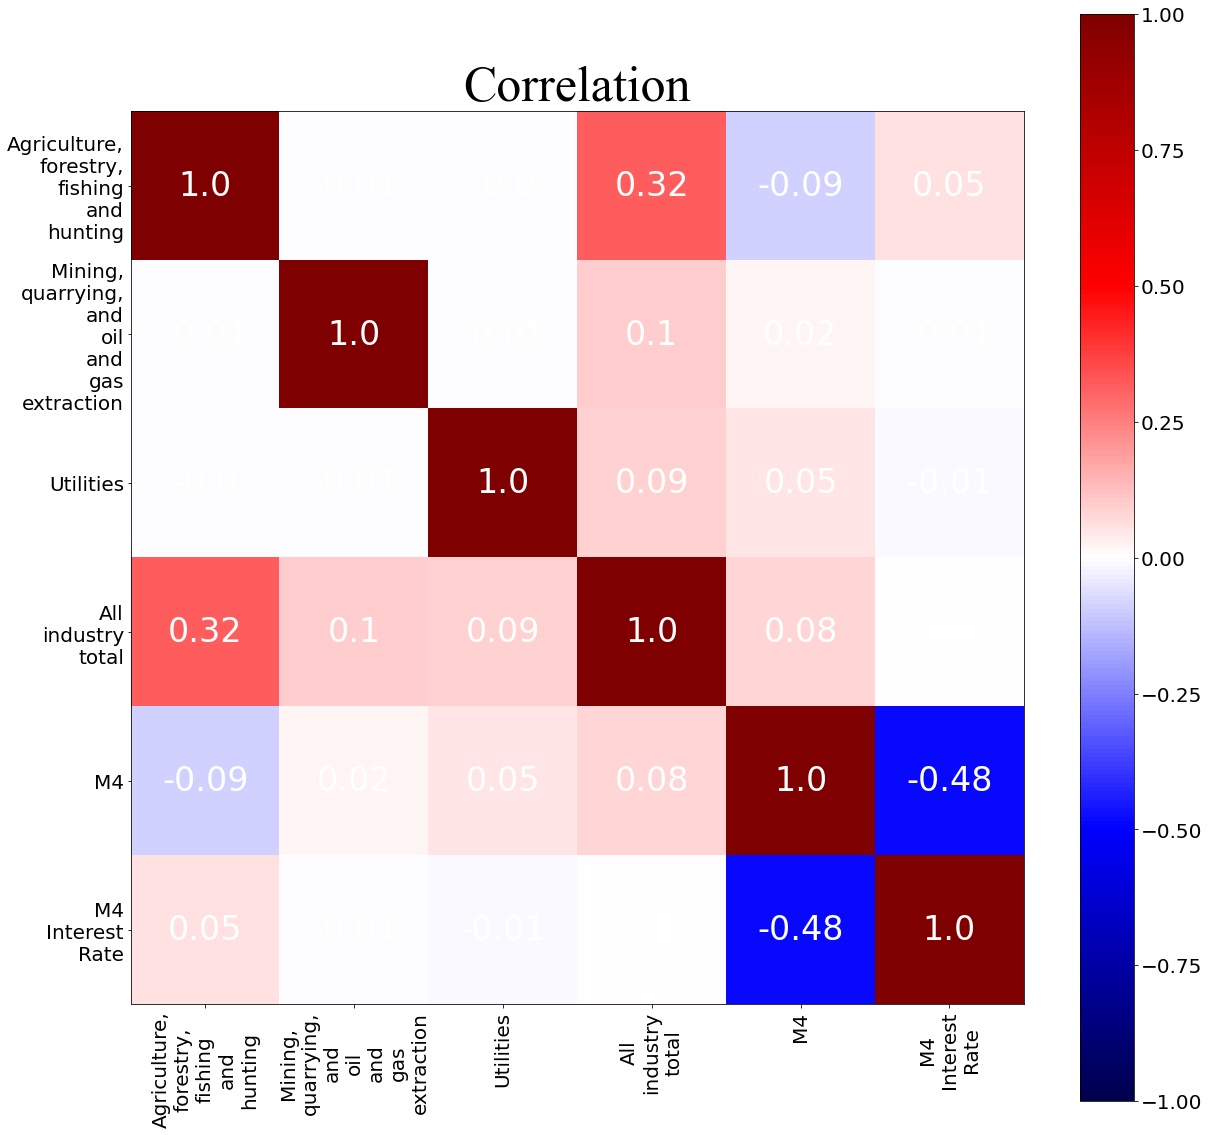

In [43]:
import numpy as np
# . . .
def corr_matrix_heatmap(data, pp = False):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if pp != False:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
corr_matrix_heatmap(plot_df.corr())


In [44]:
# list(plot_df)
# ips_df
plot_df.rename(columns = {key:key[:4].replace("\n", "") for key in plot_df.keys()}, inplace = True)
list(plot_df.keys())

['Agri', 'Mini', 'Util', 'All', 'M4', 'M4I']

C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Working for n conditional variables: 4: 100%|████████████████████████████████████████████| 4/4 [00:00<00:00,  6.58it/s]


keep control: Util
keep control: Agri
('M4I', 'M4') ['Util', 'Agri']
keep control: Util
keep control: Agri
('Mini', 'All') ['Util', 'Agri']
keep control: M4I
keep control: Util
('Agri', 'M4') ['M4I', 'Util']
keep control: Mini
keep control: Util
('Agri', 'All') ['Mini', 'Util']
keep control: M4I
keep control: Agri
('Util', 'M4') ['M4I', 'Agri']
keep control: Mini
keep control: Agri
('Util', 'All') ['Mini', 'Agri']


OutEdgeView([('M4I', 'M4'), ('Mini', 'All'), ('Agri', 'M4'), ('Agri', 'All'), ('Util', 'M4'), ('Util', 'All')])

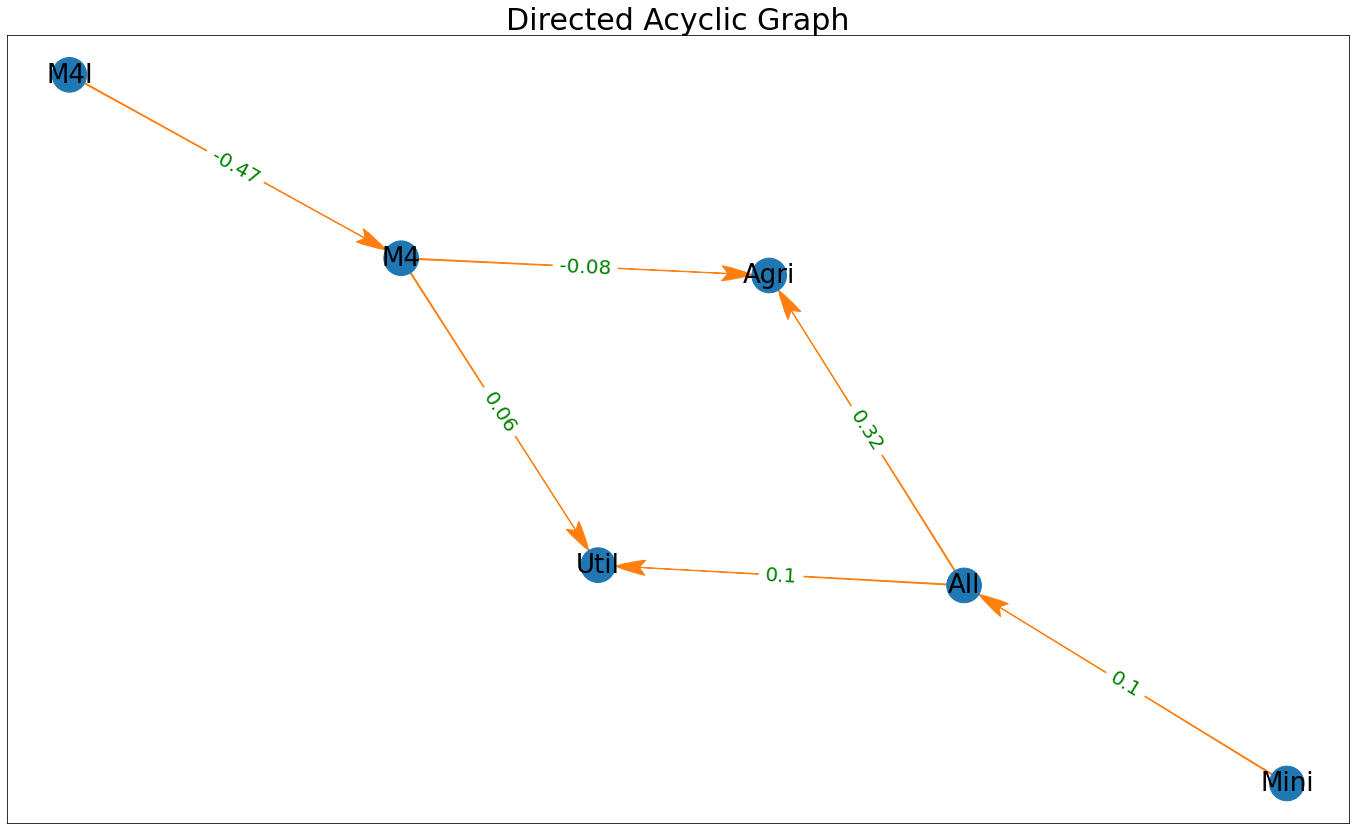

In [45]:
from matplotlib.patches import ArrowStyle
import copy
from matplotlib.backends.backend_pdf import PdfPages

undirected_graph = {key:[] for key in plot_df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in plot_df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

p_value = .01
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.estimators import PC
c = PC(plot_df)
max_cond_vars = len(plot_df.keys()) - 2

model = c.estimate(return_type = 'pdag', variant= 'parallel', significance_level = p_value,
                  max_cond_vars = max_cond_vars, ci_test = 'pearsonr')
edges = model.edges

pp = PdfPages("DAGOutputs1.pdf")

def graph_DAG(edges, df, title = ""):
    graph = nx.Graph()
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print('keep control:', control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ['C0' for g in graph]
    
    fig, ax = plt.subplots(figsize = (20, 12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200, with_labels=True,
                    arrows=True, font_color ='k', font_size=26, alpha=1, width = 1,
                    edge_color = 'C1',
                     arrowstyle=ArrowStyle('Fancy, head_length=3, head_width=1.5, tail_width=.1'), ax = ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)
    pp.savefig(fig, bbox_inches = "tight")

graph_DAG(edges, plot_df, title = 'Directed Acyclic Graph')


pp.close()                                                            
edges

In [46]:
plot_df

Agri      Mini      Util       All        M4       M4I
GeoFips TimePeriod                                                            
1001    2004       -0.570860  0.279452  0.436969  0.125152  0.005521  0.010413
        2005       -0.053545 -0.231773 -0.744634 -0.128070  0.001935 -0.000447
        2006        0.007748  0.103809  0.676109  0.045002  0.007228 -0.010214
        2007       -0.512766 -0.238435 -0.287827 -0.049211  0.014657 -0.018616
        2008       -0.375903 -0.216993 -0.332819 -0.119366 -0.058786  0.004478
...                      ...       ...       ...       ...       ...       ...
56041   2016       -0.419914 -0.141738  0.312645 -0.016646 -0.004820  0.000948
        2017       -0.173316 -0.077019 -0.206667 -0.017309 -0.000136  0.002030
        2018        0.388456 -0.049230 -0.184281 -0.013734  0.009563 -0.002135
        2019        0.608357 -0.244903  0.459370  0.013506  0.155652 -0.007996
        2020       -0.565758 -0.295273 -0.300224 -0.084335 -0.110717  0.004882

[10659 rows x 6 columns]

In [47]:
# !pip install geopandas

In [48]:
import geopandas as gpd

In [49]:
# counties = gpd.read_file("C:/Users/abiodun.idowu/OneDrive - North Dakota University System/Desktop/PhD/BEA project/notebook_to_start/tl_2022_us_county.shp")


In [50]:
# print(counties.head())

# # Rename the county name column to 'county_name'
# counties = counties.rename(columns={'NAME': 'county_name'})

# # Create a GeoDataFrame with just the county name and geometry columns
# counties_gdf = counties[['county_name', 'geometry']]


# county_gdf = counties.rename(columns={'GEOID': 'GeoFips'})

# # Check the new structure of the data

# # print(counties_gdf.head())

# # Merge the geometry column from the GeoDataFrame with the 'plot_df' DataFrame
# # merged_df = plot_df.merge(county_gdf[['GeoFips', 'geometry']], on='GeoFips')

# # 'merged_df' now contains both the attribute data from 'plot_df' and th

In [51]:
# county_gdf['GeoFips'] = county_gdf['GeoFips'].astype(str)

In [52]:
# merge_df = pd.concat([plot_df, county_gdf]).groupby('GeoFips')

In [53]:
# merge_df

In [54]:
# county_gdf

In [55]:
# print(plot_df.dtypes)
# print(county_gdf.dtypes)

In [56]:
# county_gdf['GeoFips'] = county_gdf['GeoFips'].astype(int)

In [57]:
# merge_df = pd.merge(plot_df.reset_index(), county_gdf, left_on='GeoFips', right_on='GeoFips')

In [58]:
# merge_df = merge_df.set_index('GeoFips')

In [59]:
# gdf = merge_df

In [60]:
# gdf = gdf.dropna(subset=['geometry'])

In [61]:
# gdf

In [62]:
# import geopandas as gpd
# import pandas as pd

In [63]:
# gdf = gpd.GeoDataFrame(gdf, geometry='geometry')

# # Check if a geometry intersects another geometry in the GeoDataFrame
# intersects = gdf.iloc[0].geometry.intersects(gdf.iloc[1].geometry)
# print(intersects)

In [64]:
# for index, GeoFips in gdf.iterrows():
#     neighbors = gdf[~gdf.geometry.disjoint(GeoFips.geometry)].county_name.tolist()
#     neighbor = [name for name in neighbors if GeoFips.county_name != name]
#     gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)

In [65]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the 
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [66]:
map_data.dtypes

STATEFP          int64
COUNTYFP        object
COUNTYNS        object
AFFGEOID        object
NAME            object
LSAD            object
ALAND            int64
AWATER           int64
Population     float64
state           object
geometry      geometry
dtype: object

In [67]:
# for index, fips_code in map_data.iterrows():
#     neighbors = map_data[~map_data.geometry.disjoint(fips_code.geometry)].index.tolist()
#     neighbors = [name for name in neighbors if name not in fips_code.index]
#     print(neighbors)
# map_data.at[index, "NEIGHBORS"] = neighbors

In [68]:
# for index, fips_code in map_data.iterrows():
#     neighbors = map_data[~map_data.geometry.disjoint(fips_code.geometry)].index.tolist()
#     neighbors = [name for name in neighbors if name != index]
#     print(index, neighbors)
# map_data.at[index, "NEIGHBORS"] = neighbors

In [69]:
# for index, fips_code in map_data.iterrows():
#     neighbors = map_data[~map_data.geometry.disjoint(fips_code.geometry)].index.tolist()
#     neighbors = [int(name) for name in neighbors if name != index]
#     print(index, neighbors)
# map_data.at[index, "NEIGHBORS"] = neighbors

In [70]:
# find_neighbors(year_data)

In [71]:
# for year in range (2004, 2020):
#     year_data = full_df.loc[year]
#     year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
#     find_neighbors(year_data)    
# #     year_data = year_data.join(map_data["NEIGHBORS"])
# #     year_data["NeighborGDP"]
# #     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
# #     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
# #                           axis = 1)
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)


In [72]:
def find_neighbors(df):
    for index, fips_code in df.iterrows():

        neighbors = df[~df.geometry.disjoint(fips_code.geometry)].index.tolist()
        neighbors = [int(name) for name in neighbors if name != index]
        print(index, neighbors)
    df.at[index, "NEIGHBORS"] = neighbors
find_neighbors(map_data)


21007 [17153, 17003, 29133, 21145, 21039]
21017 [21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21085, 21183, 21141, 21227, 21061, 21177]
21065 [21151, 21049, 21109, 21197, 21129]
21069 [21135, 21181, 21205, 21011, 21201, 21161]
21093 [21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21193, 21051, 21013, 21095]
21151 [21065, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21229, 21005, 21029, 21123, 21215]
17091 [17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17131, 17057, 17071, 17109, 17095]
17197 [17091, 17031, 17063, 17043, 18089, 17093]
18027 [18083, 18125, 18101, 18037, 18055]
18061 [21093, 18175, 21111, 18043, 21163, 18025]
1001 [1051, 1101, 1047, 1021, 1085]
1005 [1113, 13239, 1067, 13259, 13061, 1045, 1011, 1109]
1023 [28075, 1091, 1119, 1129, 28023, 28153, 1025]
1035 [1039, 1013, 1053, 1099]
1051 [1001, 1087, 1101, 1021

48361 [48199, 48241, 48245, 48351, 22023, 22019]
48371 [48103, 48475, 48043, 48389, 48243, 48105, 48443]
48395 [48289, 48051, 48313, 48041, 48145, 48331, 48293]
48423 [48213, 48499, 48467, 48401, 48459, 48183, 48073]
48427 [48215, 48247, 48047, 48505]
48457 [48199, 48241, 48005, 48373]
48471 [48455, 48225, 48339, 48407, 48313, 48185]
48475 [48103, 48371, 48301, 48135, 48389, 48495]
48477 [48473, 48051, 48287, 48041, 48015, 48185, 48149]
48499 [48423, 48467, 48379, 48459, 48159, 48223, 48063]
49001 [49017, 49021, 49027, 49041, 32017, 49031]
49003 [49011, 49045, 49005, 49057, 16031, 16071, 32007]
49011 [49003, 49029, 49035, 49045, 49057]
40073 [40017, 40093, 40047, 40109, 40083, 40011]
40079 [40135, 40089, 40127, 5113, 40061, 5127, 40077, 5131]
40145 [40143, 40101, 40131, 40021, 40111, 40097]
41005 [41051, 41065, 41047, 41027, 41071, 41067]
41021 [41055, 41065, 41049, 53039, 41069]
41033 [41019, 41015, 6093, 41029, 6015]
41035 [41039, 41017, 41019, 6093, 6049, 41037, 41029]
41039 [41035,

13237 [13009, 13141, 13133, 13159, 13169, 13211]
13245 [13189, 45003, 13073, 45037, 13033, 13163]
13251 [13103, 45005, 13031, 13165, 13033, 45049]
13269 [13079, 13197, 13249, 13225, 13193, 13293, 13263]
13279 [13209, 13267, 13283, 13001, 13107, 13161, 13043]
23023 [23015, 23011, 23005, 23001]
23031 [33015, 33017, 33003, 23005, 23017]
24001 [42111, 24043, 54027, 54065, 24023, 54057, 42009, 42057]
24005 [24003, 42133, 24027, 24025, 24510, 24013]
24017 [24033, 51059, 24009, 24037]
24021 [24043, 24031, 51107, 42055, 24027, 42001, 24013]
24031 [11001, 24033, 24021, 51107, 51059, 24027, 51013]
24045 [10005, 24047, 24039, 24019]
28149 [28055, 28163, 22035, 22107, 22065, 28021, 28049]
28151 [28055, 28011, 28053, 5017, 28133, 28125]
29041 [29033, 29195, 29117, 29121, 29175, 29115, 29089]
29069 [29143, 29207, 5093, 29023, 5021, 5055, 5031, 29155]
29087 [20043, 29005, 31127, 29147, 31147, 29003]
29113 [29183, 29139, 17013, 29219, 29163]
29159 [29195, 29107, 29053, 29083, 29141, 29015, 29101]
2918

51107 [24043, 24021, 24031, 54037, 51059, 51153, 51043, 51061]
51111 [51037, 51147, 51025, 51135, 51117]
51127 [51085, 51036, 51095, 51087, 51101, 51097]
51133 [51159, 51193, 51103]
51143 [51019, 51067, 51083, 51089, 51031, 37033, 37157, 51590]
51159 [51057, 51133, 51193, 51103]
51165 [51015, 54071, 51003, 54031, 51171, 51079, 51660, 51139]
51175 [37091, 37131, 51081, 51093, 51181, 37073, 51183, 51800, 51620]
51179 [51099, 51177, 51033, 51153, 51630, 51047, 51061]
51187 [51069, 51157, 51171, 51043, 51139, 51061]
53047 [53007, 53025, 53043, 53073, 53057, 53019, 53017]
53049 [53027, 53041, 53069]
53053 [53077, 53045, 53033, 53067, 53035, 53041]
53061 [53007, 53033, 53057, 53029]
53071 [53005, 53021, 41059, 53013]
53073 [53047, 53057]
54013 [54021, 54087, 54007, 54085, 54015, 54105]
54017 [54021, 54033, 54095, 54085, 54041, 54103]
54019 [54039, 54067, 54081, 54025, 54089]
54023 [54027, 54071, 54093, 54083, 24023, 54031, 54057, 54077]
54027 [51069, 24001, 54023, 54065, 54031, 54057]
54033 

48043 [48371, 48377, 48243, 48443]
48051 [48395, 48477, 48287, 48041, 48331]
48057 [48007, 48391, 48469, 48239, 48321]
48067 [22017, 48037, 48315, 48343, 5091]
48091 [48029, 48187, 48209, 48259, 48031]
48109 [48229, 35015, 48389, 48243, 35035]
48119 [48277, 48231, 48159, 48223, 48387, 48147]
48173 [48317, 48383, 48431, 48227, 48461, 48329]
48187 [48055, 48029, 48091, 48493, 48177, 48209]
48205 [48341, 35037, 48421, 48111, 35059, 48359]
48215 [48261, 48427, 48061, 48489, 48047]
48225 [48289, 48471, 48455, 48001, 48005, 48313, 48073]
48263 [48151, 48107, 48125, 48269, 48415, 48433, 48169]
48273 [48261, 48355, 48249, 48047]
48287 [48477, 48051, 48149, 48021, 48331, 48491]
48301 [48475, 35015, 48389, 35025, 48495]
48311 [48479, 48283, 48131, 48013, 48297]
48315 [22017, 48067, 48343, 48203, 48459]
48339 [48471, 48473, 48407, 48185, 48291, 48201]
48343 [48449, 48037, 48067, 48315, 48459, 48387, 48063]
48349 [48161, 48213, 48139, 48217, 48293]
48373 [48199, 48457, 48455, 48005, 48407, 48291]


37015 [37083, 37091, 37117, 37131, 37187]
37101 [37069, 37127, 37085, 37163, 37183, 37191, 37195]
37131 [37083, 37091, 51175, 37015, 51081, 51025, 37185]
37159 [37059, 37057, 37123, 37097, 37025, 37167]
37183 [37069, 37127, 37037, 37085, 37101, 37063, 37077]
13201 [13007, 13253, 13099, 13087]
13265 [13141, 13317, 13133, 13301, 13221]
44009 [9011, 44003]
45003 [45063, 13245, 45081, 45011, 45037, 13033, 45075]
45007 [45077, 45059, 45073, 45045, 45001, 13147, 13105]
45017 [45063, 45027, 45085, 45079, 45075]
45035 [45019, 45029, 45015, 45075]
45041 [45027, 45069, 45089, 45067, 45061, 45085, 45031, 45033]
45045 [37175, 45077, 37089, 37149, 45059, 45083, 45007, 45001]
45051 [45043, 45067, 37019, 37047, 37155, 45033]
30007 [30031, 30049, 30059, 30043]
30093 [30023, 30057, 30001, 30043]
37051 [37093, 37017, 37085, 37163, 37125, 37155]
37139 [37029, 37143, 37073]
45061 [45055, 45041, 45085, 45031]
46055 [46093, 46117, 46041, 46071, 46075, 46103, 46137]
47045 [47097, 5093, 47053, 47131, 47095, 2

1133 [1043, 1093, 1059, 1127, 1079]
2070 [2050, 2164]
2110 [2100, 2105]
2150 [2122, 2164]
2220 [2198, 2105]
2261 [2282, 2240, 2170, 2020, 2122]
48389 [48371, 48475, 35015, 48109, 48301, 48243]
49017 [49001, 49025, 49037, 49021, 49055, 49031]
51093 [51175, 51181, 51800, 51620]
51171 [51069, 51165, 51187, 54031, 51139]
53021 [53005, 53025, 53071, 53075, 53013, 53001]
53055 []
5069 [5025, 5001, 5119, 5085, 5053, 5079]
5107 [5095, 28143, 28011, 5001, 5041, 5077, 28027]
6041 [6097, 6075]
6077 [6001, 6005, 6013, 6009, 6099, 6067]
8001 [8031, 8005, 8059, 8121, 8014, 8123, 8087]
1059 [28141, 1033, 1093, 1133, 28057, 1079]
1097 [1129, 28041, 28059, 28039, 1003]
48283 [48479, 48311, 48131, 48163, 48127, 48013]
48401 [48347, 48423, 48203, 48419, 48365, 48183, 48073]
48459 [48423, 48499, 48315, 48343, 48203, 48183, 48063]
49037 [8077, 8083, 49025, 4005, 35045, 8113, 4001, 49019, 8033, 49017, 49055, 8085, 4017, 49015]
51027 [21195, 51051, 51185, 54047, 54059, 51167]
51101 [51085, 51033, 51127, 5109

20087 [20085, 20045, 20177, 20005, 20103]
20089 [20029, 20183, 20141, 20123, 20157, 31181, 31129]
46109 [27011, 27155, 46051, 46091, 46037, 38081, 38077]
46121 [46095, 46123, 46071, 31031, 46007]
53051 [53065, 16021, 53063, 16017]
53059 [41051, 53015, 53077, 53011, 41027, 53041, 53039]
54011 [54043, 54099, 39053, 54079, 54053, 39087]
23011 [23015, 23023, 23007, 23025, 23027, 23001]
24019 [24011, 24045, 10005, 24041]
38103 [38005, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [30073, 30035, 30051]
31003 [31119, 31089, 31139, 31183, 31107, 31011]
48275 [48155, 48269, 48447, 48433, 48023, 48207]
31029 [8125, 31085, 31135, 31057, 8095]
24025 [24005, 42133, 42071, 24015]
24035 [24011, 24029, 10001, 24041]
25009 [25025, 25017, 33015, 33011]
26015 [26045, 26077, 26067, 26005, 26025, 26081]
38045 [38003, 38051, 38021, 38047, 38073, 38093]
38051 [38045, 46089, 38029, 38021, 38047, 46021]
38095 [38005, 38071, 38019, 38069, 38079]
38101 [38055, 38061, 38013, 38049, 38075]
25003 [25013, 9005, 25

48303 [48107, 48279, 48445, 48189, 48219, 48305, 48153, 48169]
51540 [51003]
51570 [51041, 51730]
51610 [51059, 51013]
2060 [2164]
2068 [2090, 2240, 2170, 2290]
2188 [2180, 2290, 2185]
2230 [2100]
2275 [2130, 2195]
30019 [30085, 30105, 30091]
39025 [39061, 39165, 21191, 39027, 39015, 21037, 21023]
39053 [54011, 39105, 39163, 39079, 54053, 39087]
39067 [39019, 39157, 39013, 39059, 39081]
31153 [31055, 31025, 19129, 31155, 19155]
2013 [2164]
40093 [40073, 40151, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40047, 40071, 40119, 40083]
40053 [20077, 40047, 40071, 20191, 40003]
31081 [31035, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5055, 29181]
5023 [5063, 5045, 5145, 5141, 5137]
5037 [5067, 5147, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27007]
19197 [19083, 1

13253 [12039, 13201, 13099, 13087, 12063, 1069]
13277 [13075, 13019, 13287, 13321, 13071, 13155]
48369 [48069, 48279, 48017, 35009, 48117]
48381 [48011, 48065, 48069, 48375, 48359, 48437, 48117]
17041 [17183, 17029, 17019, 17147, 17139, 17045]
5113 [40079, 5061, 5109, 5133, 40089, 5127, 5097]
26125 [26099, 26163, 26093, 26087, 26161, 26049]
21169 [21099, 21001, 21171, 21087, 21009, 21057]
48487 [40065, 40141, 48485, 48009, 48155, 48197, 48023]
48493 [48029, 48187, 48177, 48013, 48255]
42075 [42071, 42043, 42011, 42107]
24510 [24003, 24005]
25019 []
36095 [36077, 36025, 36057, 36039, 36093, 36001]
19095 [19113, 19103, 19171, 19157, 19011, 19107, 19183]
19099 [19127, 19169, 19171, 19125, 19153, 19157, 19123]
13015 [13233, 13223, 13057, 13115, 13067, 13129, 13227]
47075 [47097, 47167, 47113, 47069, 47047, 47033]
17051 [17027, 17121, 17135, 17173, 17005, 17025, 17049]
5055 [5121, 29069, 5021, 5031, 5075]
8014 [8013, 8001, 8059, 8123]
5065 [5063, 5049, 5135, 5005, 5137]
5071 [5101, 5115, 50

18015 [18067, 18181, 18017, 18157, 18023]
16071 [49003, 16041, 49005, 16031, 16077, 16005]
17167 [17129, 17017, 17107, 17115, 17135, 17021, 17137, 17117]
18163 [18129, 18051, 21101, 18173]
18165 [17183, 18121, 18171, 18045, 18167, 17045]
18169 [18103, 18053, 18085, 18069, 18049, 18183]
54055 [51185, 54047, 54081, 54109, 54089, 51021, 51071]
13299 [13229, 13025, 13003, 13069, 13065, 13049, 13005, 12003]
26093 [26065, 26075, 26155, 26125, 26161, 26049]
17203 [17179, 17113, 17099, 17105, 17123, 17143]
8085 [8029, 8077, 8091, 8113, 49019, 8051, 49037]
12021 [12086, 12071, 12087, 12051, 12011]
12051 [12093, 12071, 12099, 12021, 12011, 12015, 12043, 12085]
17147 [17115, 17019, 17041, 17113, 17139, 17039]
48097 [48337, 48497, 48121, 40085, 48181]
48113 [48139, 48397, 48257, 48085, 48439, 48121]
13307 [13261, 13197, 13243, 13273, 13259]
17141 [17007, 17015, 17177, 17195, 17103, 17201, 17037]
17157 [29157, 17189, 17145, 17133, 29186, 17077, 17163]
47109 [47069, 47071, 47023, 28003]
47113 [47053

27155 [27011, 27167, 46109, 27149, 38077, 27051]
27159 [27021, 27153, 27005, 27057, 27111]
27169 [55011, 55121, 27157, 27109, 27045, 27055, 55063]
36049 [36043, 36045, 36065, 36075, 36089]
39059 [39067, 39119, 39157, 39013, 39121, 39031]
5027 [22119, 5099, 5103, 5073, 22027, 5139]
48087 [40057, 48129, 48179, 40009, 48483, 48191, 48075]
48235 [48383, 48451, 48413, 48105]
48243 [48229, 48371, 48043, 48109, 48377, 48389]
48249 [48273, 48409, 48355, 48131, 48047, 48297]
29181 [5121, 29023, 29149, 29035, 5021]
31013 [31123, 31161, 31165, 31045, 31157]
48281 [48053, 48333, 48411, 48027, 48193, 48099]
48291 [48199, 48245, 48339, 48373, 48407, 48071, 48201]
41009 [41051, 53015, 41007, 53011, 41057, 53069, 41067]
28065 [28091, 28127, 28073, 28031, 28077]
28069 [28075, 1119, 28103, 28159, 28099, 28101]
29107 [29033, 29159, 29195, 29095, 29177, 29101]
13061 [1005, 13037, 13243, 13239, 1067, 13099]
28039 [1097, 28041, 28059, 28111, 28131]
37081 [37057, 37001, 37169, 37157, 37151, 37067]
37119 [450

20205 [20049, 20073, 20001, 20125, 20133, 20207]
48447 [48429, 48503, 48275, 48009, 48417, 48023, 48207]
29139 [29113, 29027, 29151, 29007, 29219, 29073, 29163]
47103 [1089, 47003, 47117, 47127, 47055, 1083, 47051]
31121 [31081, 31141, 31093, 31125, 31143, 31079]
31125 [31141, 31077, 31093, 31121, 31011]
46135 [46067, 46009, 46125, 46027, 31027, 31107]
5127 [40079, 5149, 5113, 5083, 5097, 5131]
13199 [13077, 13145, 13285, 13255, 13293, 13231, 13263]
21211 [21005, 21103, 21111, 21215, 21073, 21185]
40091 [40101, 40107, 40121, 40061, 40111, 40063]
19037 [19017, 19131, 19191, 19089, 19023, 19067, 19065]
55141 [55001, 55057, 55073, 55097, 55019, 55053]
30079 [30055, 30033, 30109, 30017, 30021, 30025]
38019 [38099, 38067, 38071, 38095]
38021 [38045, 38051, 46089, 46013, 38073, 38081]
47027 [47087, 21171, 47133, 21053, 47137, 47111, 21057]
47047 [47157, 47167, 47075, 47069, 28009, 28093]
55027 [55025, 55039, 55021, 55133, 55047, 55055, 55131]
21015 [39061, 18115, 21077, 18029, 18155, 21081, 

17087 [17153, 17151, 17165, 17181, 17127, 17199]
51590 [51143, 37033]
27079 [27139, 27013, 27161, 27103, 27131, 27143]
42087 [42067, 42027, 42061, 42119, 42109]
20007 [20095, 20033, 20097, 20077, 40151, 20151, 40003]
20117 [20149, 31133, 20131, 31067, 20201, 20161]
19121 [19175, 19001, 19049, 19181, 19077, 19153, 19039]
19151 [19147, 19025, 19041, 19187, 19109, 19161, 19021, 19091]
19179 [19007, 19135, 19101, 19051, 19123, 19107, 19177]
27039 [27109, 27147, 27131, 27099, 27049]
27063 [27091, 27033, 19143, 27165, 19059, 19063, 27105]
48415 [48151, 48263, 48353, 48033, 48335, 48169]
27111 [27167, 27153, 27041, 27005, 27159, 27051, 27027]
27165 [27091, 27013, 27015, 27033, 27063]
19107 [19095, 19101, 19157, 19123, 19179, 19183]
20207 [20073, 20001, 20031, 20205, 20133, 20003]
21061 [21031, 21099, 21085, 21227, 21009]
38079 [38095, 38009, 38069]
48193 [48035, 48333, 48093, 48143, 48281, 48099]
48433 [48151, 48263, 48275, 48125, 48253, 48269, 48207]
48505 [48427, 48479, 48247]
13297 [13217,

55041 [55037, 55075, 26071, 55085, 55067, 55083, 55125]
39045 [39127, 39073, 39129, 39089, 39049]
5033 [40135, 40001, 5047, 5087, 5143, 5131]
29163 [29113, 17149, 29173, 29139, 17013, 29007]
36083 [36091, 36115, 25003, 50003, 36021, 36039, 36001]
54105 [54087, 54107, 54013, 54085, 54035]
48019 [48029, 48385, 48259, 48463, 48325, 48265]
51770 [51161, 51775]
51775 [51161, 51770]
13275 [12065, 12073, 13027, 13205, 13071, 13131]
31079 [31081, 31093, 31121, 31001, 31019]
8045 [8077, 8037, 49047, 8097, 49019, 8103, 8107]
2198 [2130, 2195, 2220]
13227 [13123, 13057, 13085, 13015, 13129]
48181 [40013, 40095, 48097, 48085, 48121, 40085, 48147]
48195 [48341, 48421, 48357, 48233, 40139, 48393]
48211 [40045, 48179, 48483, 40129, 48393, 48295]
48295 [40045, 48357, 40007, 48393, 48211]
51620 [51175, 51093]
55103 [55043, 55023, 55111, 55123, 55049]
55065 [55043, 17177, 17085, 55049, 55045]
13281 [13291, 13137, 37043, 13311, 13241]
47137 [47049, 21231, 47151, 47133, 47027, 21053]
46083 [46127, 46099, 

8095 [8125, 31029, 8115, 8075, 31135]
48207 [48275, 48417, 48253, 48269, 48447, 48433, 48023]
54075 [51017, 51091, 54071, 54025, 54083, 54101]
25015 [25013, 25003, 25011, 25027]
21115 [21071, 21153, 21159, 21175, 21127]
39161 [39125, 39137, 18003, 39107, 18001, 39003, 39011]
29043 [29109, 29077, 29067, 29225, 29209, 29213]
13097 [13121, 13223, 13067, 13045]
13155 [13019, 13069, 13287, 13277, 13017]
38075 [38101, 38009, 38013, 38049]
38093 [38003, 38103, 38045, 38039, 38043, 38031, 38047]
39003 [39137, 39065, 39063, 39161, 39011]
39021 [39159, 39097, 39091, 39023, 39149, 39109]
1081 [1113, 1087, 13215, 1017, 13145, 1123]
26127 [26121, 26123, 26105, 26085]
26145 [26017, 26155, 26057, 26111, 26049, 26157]
49039 [49049, 49007, 49023, 49027, 49041, 49015]
50005 [50017, 50009, 50019, 50015, 50023, 33009]
51167 [51051, 51185, 51195, 51027, 51191, 51173, 51169]
51595 [51081]
51678 [51163]
41069 [41021, 41065, 41023, 41031, 41049, 41013]
42085 [42073, 42121, 39099, 42019, 39155, 42039]
22061 [2

ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
full_df = full_df.reset_index()
full_df["FIPS"] = full_df["GeoFips"]
full_df = full_df.set_index(["TimePeriod","GeoFips"])
full_df.dropna(subset = ["All industry total"], inplace = True)

In [ ]:
full_df["NeighborGDP"] = np.NaN

for year in range (2004, 2020):
    year_data = full_df.loc[year]
    year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
    find_neighbors(year_data)    
#     year_data = year_data.join(map_data["NEIGHBORS"])
#     year_data["NeighborGDP"]
#     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)
    full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
                          axis = 1)


In [ ]:
# test_data

In [ ]:
# test_data = map_data.join(year_data).dropna(subset = ["All industry total"])
# find_neighbors(test_data)
# # year_data

In [ ]:
# for index, GeoFips in county_gdf.iterrows():
#     neighbors = county_gdf[~county_gdf.geometry.disjoint(GeoFips.geometry)].county_name.tolist()
#     neighbor = [name for name in neighbors if GeoFips.county_name != name]
#     county_gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)

In [ ]:
# county_gdf.to_file("C:/Users/abiodun.idowu/OneDrive - North Dakota University System/Desktop/PhD/BEA project/notebook_to_start/newfile.shp")


In [ ]:
#drop columns 9 to 24 
# gdf = gdf.drop(gdf.columns[9:24], axis=1)

In [ ]:
# county_gdf

In [ ]:
# merge_df1 = pd.merge(plot_df.reset_index(), county_gdf, left_on='GeoFips', right_on='GeoFips')

In [ ]:
# merge_df1 = merge_df1.set_index('GeoFips')

In [ ]:
# merge_df1

In [ ]:
# import geopandas as gpd

# fig, ax = plt.subplots(figsize=(26,16))
# county_gdf.plot(column='NEIGHBORS', ax=ax)

In [ ]:
# print(county_gdf.dtypes)

In [ ]:
# test_df = pd.merge(county_gdf.reset_index(), plot_df, left_on='GeoFips', right_on='GeoFips')

In [ ]:
# test_df = test_df.set_index('GeoFips')

In [ ]:
# test_df

In [ ]:
# #create a column with the sum of neighboring gdps

# for index, GeoFips in gdf.iterrows():
#     neighbors = gdf[~gdf.geometry.disjoint(GeoFips.geometry)].county_name.tolist()
#     neighbor = [name for name in neighbors if GeoFips.county_name != name]
    
#     neighboring_GDP = gdf[gdf.county_name.isin(neighbors)]["All"].sum()
#     gdf.at[index, "gdp_sum"] = neighboring_GDP

In [ ]:
# map_data.index

In [ ]:
# full_df = full_df.reset_index()
# full_df["FIPS"] = full_df["GeoFips"]
# full_df = full_df.set_index(["TimePeriod","GeoFips"])
# full_df.dropna(subset = ["All industry total"], inplace = True)

In [ ]:
# full_df

In [ ]:
# # neighbors = map_data.loc[21007,"NEIGHBORS"]

# full_df["NeighborGDP"] = np.NaN

# for year in range(2004,2020):
#     year_data = full_df.loc[year]
#     year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
#     find_neighbors(year_data)    
# #     year_data = year_data.join(map_data["NEIGHBORS"])
# #     year_data["NeighborGDP"]
# #     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
# #     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
# #                           axis = 1)
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)
# #     full_df.loc[year, "NeighborGDP"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
# #                           axis = 1)

    
#     #     gdf["NeighborGDP"][gdf["TimePeriod"] == year]] = year_data[year_data.county_name.isin(neighbors)]["All"].sum()

# # for row in year_data.iterrows():
# #     print(row[0])

In [ ]:
# full_df["All industry total"]

In [ ]:
# full_df["NeighborGDP"]

In [ ]:
# full_df.dropna(subset = ["All industry total"])

In [ ]:
#  map_data.loc[year_data.loc[1001]["FIPS"]]["NEIGHBORS"]

In [ ]:
# map_data.loc[1001]["NEIGHBORS"]

In [ ]:
# gdf["NeighborGDP"] = np.NaN
# for year in range(2004,2020):
#     year_data = gdf[gdf["TimePeriod"] == 2004]
#     gdf["NeighborGDP"][gdf["TimePeriod"] == 2004] = year_data[year_data.county_name.isin(neighbors)]["All"].sum()


In [ ]:
# gdf

In [ ]:
# !pip install pygeos

In [ ]:
# summing the gdp for neighbor per year